# Results

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

## Beijing A

In [145]:
splits = 6

In [146]:
dfs = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST']:
    try:
        odf = pd.read_csv(f"./results/beijinga_scaled/{reg}/final.csv")
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            dfs.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass

df = pd.concat(dfs)
df.head()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
6568,False,Lasso,2,10,0,-1,29,7,45.028495,43.616394
6569,False,Lasso,2,10,0,-1,31,7,25.015194,24.804973
6570,False,Lasso,2,10,0,-1,33,7,10.556225,8.817482
6571,False,Lasso,2,10,0,-1,35,7,14.143677,12.072854
6572,False,Lasso,2,10,0,-1,37,7,26.068308,23.852236


In [147]:
new_df.head()

,0,1,2,3,4,5
0.0,15.495729,9.074284,14.958944,12.849246,13.430140,23.996137
0.0027472527472527475,5.762826,12.244261,8.022479,8.732769,9.640911,7.551736
0.005494505494505495,23.986665,11.964511,12.513485,13.335843,21.894168,23.115498
0.008241758241758242,6.308538,8.949690,3.502849,7.911797,6.522828,8.264352
0.01098901098901099,9.254345,12.233325,4.433633,11.509604,10.110051,9.745908


In [148]:
temp = {
    "reg": [],
    "time_ix": [],
    "rmse": [],
    "mae": [],
    "kout": [],
}
for reg in ['idw', 'krig', 'spatial_gp']:
    df_rmse = pd.read_csv(f"../interpol_baselines/{reg}_rmse.csv").T
    df_mae = pd.read_csv(f"../interpol_baselines/{reg}_mae.csv").T
    for ix, row in enumerate(sorted(new_df.index)):
        if ix % 2 == 1:
            continue
        temp["reg"].extend([reg] * splits)
        temp["time_ix"].extend([ix] * splits)
        temp["rmse"].extend(list(df_rmse.loc[row][[i for i in range(splits)]]))
        temp["mae"].extend(list(df_mae.loc[row][[i for i in range(splits)]]))
        temp["kout"].extend(list(range(splits)))

values_total = len(temp["reg"])
temp["lastKDays"] = [1] * values_total
temp["is_val_error"] = [False] * values_total
temp["stepSize"] = [2] * values_total
temp["kin"] = [-1] * values_total
temp["kout"] = [-1] * values_total
temp["hy_ix"] = [-1] * values_total
for col in df.columns:
    temp[col]
interpols = pd.DataFrame(temp)[df.columns]
interpols.head()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
0,False,idw,2,1,-1,-1,0,-1,13.694027,11.545963
1,False,idw,2,1,-1,-1,0,-1,11.425423,9.933490
2,False,idw,2,1,-1,-1,0,-1,12.291024,11.957464
3,False,idw,2,1,-1,-1,0,-1,10.338158,8.117333
4,False,idw,2,1,-1,-1,0,-1,11.219503,8.977930


In [149]:
df = df.append(interpols)

In [150]:
df.tail()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
3217,False,spatial_gp,2,1,-1,-1,356,-1,7.450887,5.665492
3218,False,spatial_gp,2,1,-1,-1,356,-1,9.368780,6.531100
3219,False,spatial_gp,2,1,-1,-1,356,-1,4.476387,3.711090
3220,False,spatial_gp,2,1,-1,-1,356,-1,3.331551,2.931952
3221,False,spatial_gp,2,1,-1,-1,356,-1,5.154004,3.739507


Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing A.')

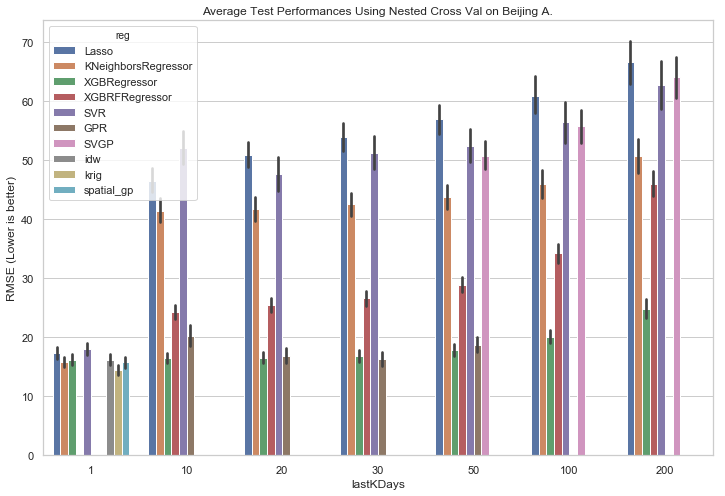

In [151]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.ylabel("RMSE (Lower is better)")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing A.")

In [153]:
df.groupby(["lastKDays", "reg"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays reg                                                          
1         KNeighborsRegressor         False       2.0  2.507042 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
          idw                         False       2.0 -1.000000 -1.0   
          krig                        False       2.0 -1.000000 -1.0   
          spatial_gp                  False       2.0 -1.000000 -1.0   
10        GPR                         False       2.0  2.522655 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.494565 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.515385 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        GPR                         False       2.0  2.549941 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
100       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
200       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays reg                                                           
1         KNeighborsRegressor  178.726761    9.0  15.819625  12.342030  
          Lasso                178.000000    7.0  17.277380  13.753197  
          SVR                  178.000000    5.0  18.016417  14.075834  
          XGBRegressor         178.000000   12.0  16.161618  12.495159  
          idw                  178.000000   -1.0  16.201304  12.579337  
          krig                 178.000000   -1.0  14.385635  11.212135  
          spatial_gp           178.000000   -1.0  15.759082  12.166557  
10        GPR                  194.850369   -1.0  20.234332  

## Beijing B

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing B.')

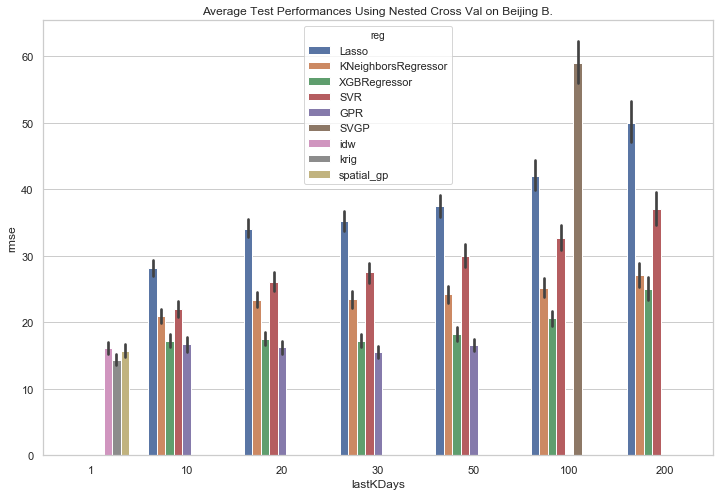

In [107]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', "gpFULL"]:
    try:
        odf = pd.read_csv(f"./results/beijingb_scaled/{reg}/final.csv")
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass
df = pd.concat(temp)
df = df.append(interpols)
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing B.")

In [108]:
df.groupby(["lastKDays", "reg"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays reg                                                          
1         idw                         False       2.0 -1.000000 -1.0   
          krig                        False       2.0 -1.000000 -1.0   
          spatial_gp                  False       2.0 -1.000000 -1.0   
10        GPR                         False       2.0  2.518947 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.520879 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.514739 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        GPR                         False       2.0  2.538835 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
100       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
200       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays reg                                                           
1         idw                  178.000000   -1.0  16.201304  12.579337  
          krig                 178.000000   -1.0  14.385635  11.212135  
          spatial_gp           178.000000   -1.0  15.759082  12.166557  
10        GPR                  194.345263   -1.0  16.691106  13.144337  
          KNeighborsRegressor  193.000000    9.0  21.008332  16.236408  
          Lasso                193.000000    7.0  28.128604  23.345789  
          SVR                  193.000000    5.0  22.005239  17.376902  
          XGBRegressor         193.000000   12.0  17.239761  13.284435  
20        GPR                  191.942857   -1.0  16.253796  12.679077  
          KNeighborsRegressor  193.000000    9.0  23.356580  18.296314  
          Lasso                193.000000    7.0  34.100062  29.533959  
          SVR                  193.000000    5.0  26.036364  21.227913  
          XGBRegressor         193.000000   12.0  17.543402  13.583216  
30        GPR                  190.324263   -1.0  15.568837  12.313509  
          KNeighborsRegressor  193.000000    9.0  23.485494  18.427939  
          Lasso                193.000000    7.0  35.216964  30.421231  
          SVR                  193.000000    5.0  27.494888  22.500702  
          XGBRegressor         193.000000   12.0  17.205029  13.341834  
50        GPR                  200.388350   -1.0  16.619074  13.216775  
          KNeighborsRegressor  203.000000    9.0 